# M3: Project 3a
**Author**: Jacob Buysse

This notebook is an analysis of the Iris flower data set.
I will discuss the reflection questions first.
You can scroll past the questions to see the analysis.

# Reflection Questions

## Part I

Visually, the second decision boundary (`y = 0.75x – 0.9`) looked like the best one for separating setosa from not setosa.
It ended up having an accuracy of 99.3%, which is pretty good.
The accuracy metric seemed to be a good method for determining if a boundary was good (or at least a good way to compare two different boundaries to see which one was better).

## Part II

The petal length vs. width were much better features to use for separating the versicolor from the virginica.
The scatter plot of the sepal length vs. width had so much overlapping noise that no linear model was going to give a very high accuracy.
This was a good example of how important it is to choose the correct features when performing analysis.
While we can use math and find an optimal linear solution using the sepal length and width, it likely isn't going to result in a very accurate model.
Just eyeballing the linear model resulted in a 74% accuracy when using sepal length/width and 94% accuracy when using petal length/width.

## Part III

1 - The training data set resulted in a 100% accuracy.  This means little more than to say that there exists at least one line that perfectly partitioned the data.  The testing data set resulted in a 97.6% accuracy.  This was a better test of the fitness of the model.  Overall, it showed that the model was a relatively good one.  The target data set resulted in a 97.2% accuracy.  This served as a good second example of the fitness of the model.  While slightly less than the accuracy of the testing data, it was still close enough to show that there is a reasonable confidence in the overall fitness of the model.

2 - Evaluating a model using the same data it was trained on isn't a very good benchmark. The regression was able to get to 100% accuracy for the training data sets but only around 97% for the testing and target data sets. Especially in more complicated learning algorithms, the model will likely be able to highly predict the training data set.  This could either be due to a poor distribution of test samples or due to overfitting from the model.  

3 - Keeping your available data split (along carefully selected boundaries) should allow you to better evaluate your model without sacrificing the power in generating the model.  By not sharing any of the training data points, there is no way the model can accidentally overfit for these specific data points.  So long as the testing data set is a proper distribution (relatively equal numbers of each classification) yet still randomly selected (from the full range of possible values) it should act as a fair judge for how accurate you can expect your model to be when predicting new data points.

## Part IV

_No reflection questions for this part._

# Analysis

We will be using the pandas, matplotlib, seaborn, numpy, and scikit-learn libraries as well as the decision_boundaries module provided for the class.

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from decision_boundaries import linear_decision_boundary_classifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

We will configure our plots for readable labels, high resolution, and automatic layout.

In [2]:
plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150, autolayout=True)

We will define a helper function to plot a line on the current plot given the slope/intercept to help visualize boundaries.

In [3]:
def plot_line(slope, intercept, line_style, label):
    axes = plt.pyplot.gca()
    y_vals = np.array(axes.get_ylim())
    x_vals = (y_vals - intercept) / slope
    line, = plt.pyplot.plot(x_vals, y_vals, line_style, label=label)
    return line

# Part I - Decision Boundaries and Evaluation of Model Predictions With Metrics
We will load the `setosa_data.csv` file (provided for the class) and inspect the info/describe/head results.

In [4]:
df = pd.read_csv('./setosa_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              150 non-null    object 
 1   sepal_length (cm)  150 non-null    float64
 2   sepal_width (cm)   150 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [5]:
df.describe()

,sepal_length (cm),sepal_width (cm)
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [6]:
df.head()

,label,sepal_length (cm),sepal_width (cm)
0,not setosa,5.1,3.5
1,not setosa,4.9,3.0
2,not setosa,4.7,3.2
3,not setosa,4.6,3.1
4,not setosa,5.0,3.6


We will show a scatter plot of the sepal length vs. width with the provided labels.

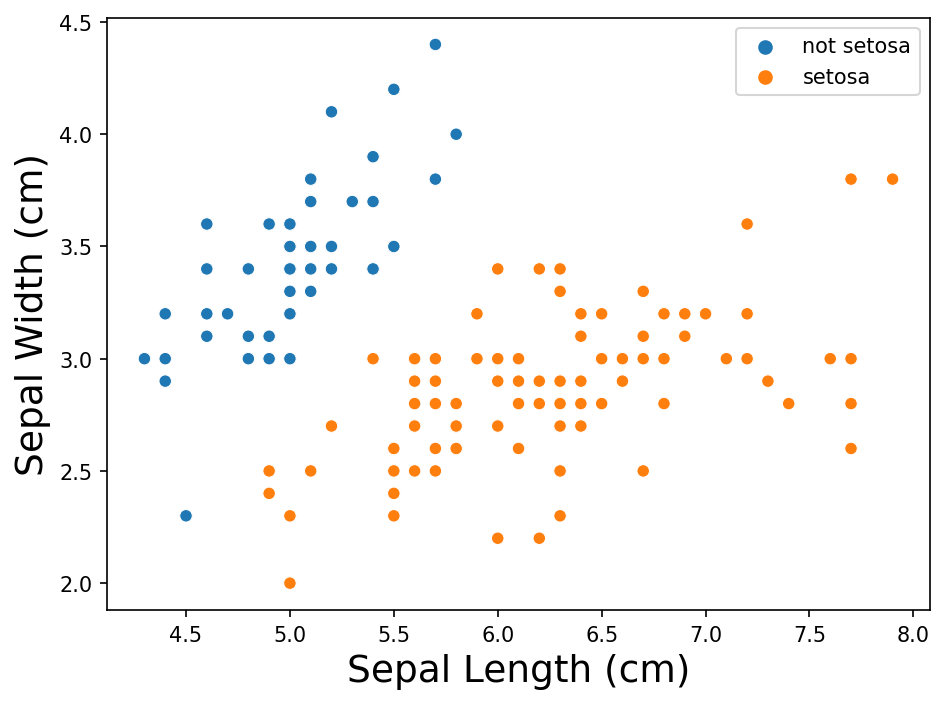

In [7]:
plot = sns.scatterplot(data=df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label")
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");

Now we will analyze three different linear boundaries (provided by the instructions).  Let us show a scatter plot of the given labels which each of the three boundary lines.

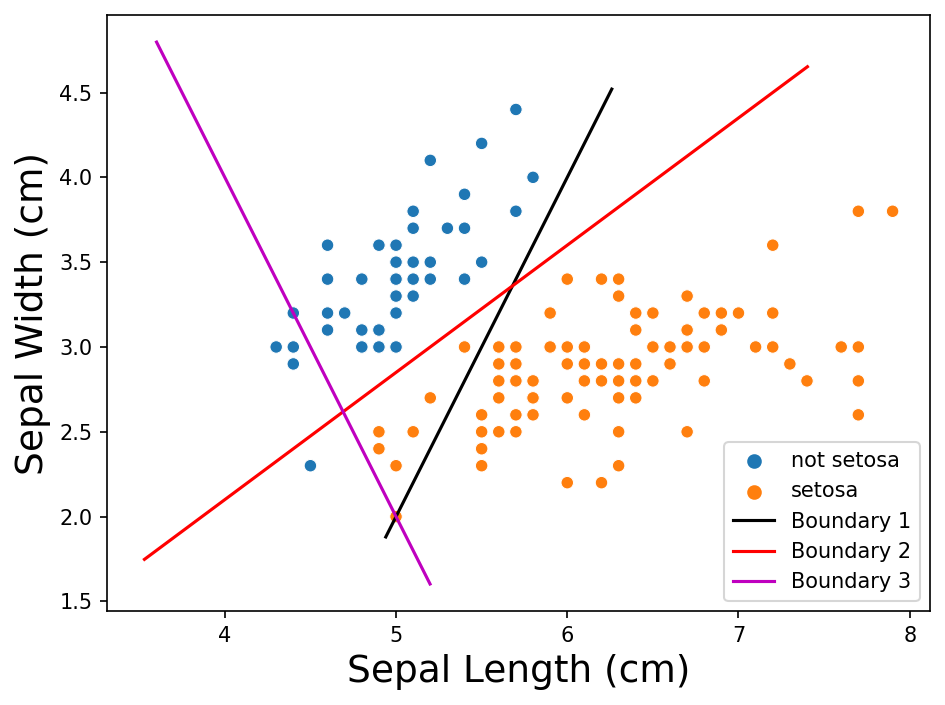

In [8]:
plot = sns.scatterplot(data=df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label")
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");
line1 = plot_line(2, -8, "k", "Boundary 1")
line2 = plot_line(0.75, -0.90, "r", "Boundary 2")
line3 = plot_line(-2, 12, "m", "Boundary 3")
plt.pyplot.legend(handles=plot.get_legend().legend_handles + [line1, line2, line3]);

And now let us get the predicted labels for each boundary and compute the accuracy of each.

-  Boundary 1 - `2x - y - 8 = 0`
-  Boundary 2 - `0.75x - y - 0.9 = 0`
-  Boundary 3 - `-2x - y + 12 = 0`

In [9]:
features = df[["sepal_length (cm)", "sepal_width (cm)"]].values
class_names = ["not setosa", "setosa"]

dec_bound_vec_1 = np.array([2, -1.00, -8])
pred_labels_1 = linear_decision_boundary_classifier(dec_bound_vec_1, features, class_names=class_names)
print(f"Boundary 1 Accuracy: {accuracy_score(df.label, pred_labels_1):.1%}")

dec_bound_vec_2 = np.array([0.75, -1.00, -0.90])
pred_labels_2 = linear_decision_boundary_classifier(dec_bound_vec_2, features, class_names=class_names)
print(f"Boundary 2 Accuracy: {accuracy_score(df.label, pred_labels_2):.1%}")

dec_bound_vec_3 = np.array([-2, -1.00, 12])
pred_labels_3 = linear_decision_boundary_classifier(dec_bound_vec_3, features, class_names=class_names)
print(f"Boundary 3 Accuracy: {accuracy_score(df.label, pred_labels_3):.1%}")

Boundary 1 Accuracy: 95.3%
Boundary 2 Accuracy: 99.3%
Boundary 3 Accuracy: 30.7%


We can see the following accuracy results:

-  Boundary 1 - 95.3%
-  Boundary 2 - 99.3%
-  Boundary 3 - 30.7%

## Part II - Predictive Power of Features

Now let us load another data file that contains labels for versicolor vs. virginica and view the info for the resulting data frame.

In [10]:
vv_df = pd.read_csv('./versicolor_virginica_data.csv')
vv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              100 non-null    object 
 1   sepal_length (cm)  100 non-null    float64
 2   sepal_width (cm)   100 non-null    float64
 3   petal_length (cm)  100 non-null    float64
 4   petal_width (cm)   100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


Now let us see a scatter plot of the sepal length vs. width.

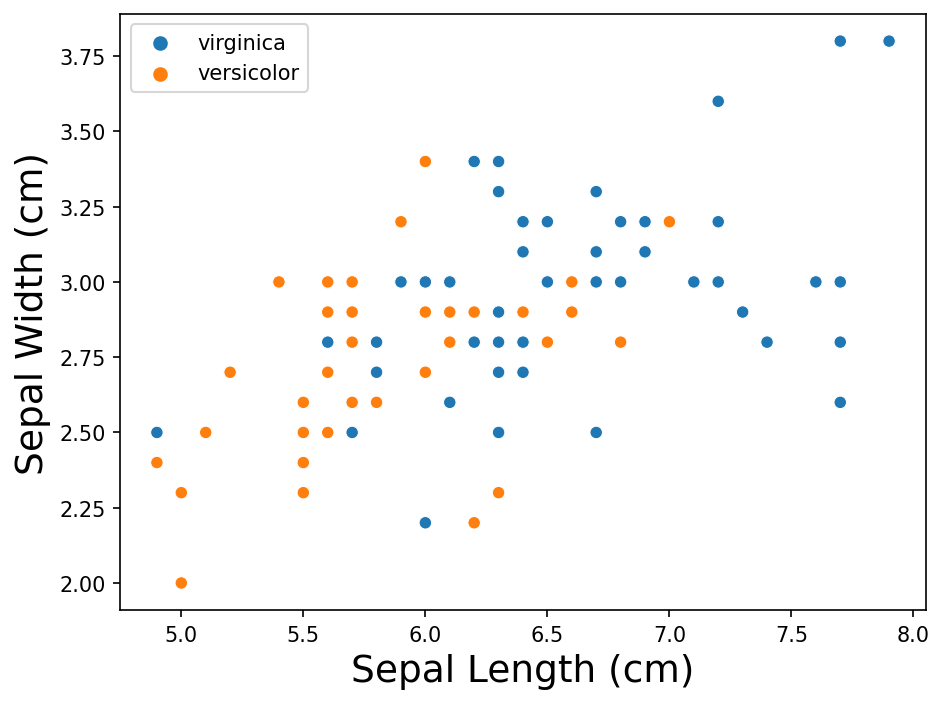

In [11]:
hue_order = ["virginica", "versicolor"]
plot = sns.scatterplot(data=vv_df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label", hue_order=hue_order)
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");

By just eyeballing the above graph, we need to determine a good boundary.  A vertical line around 6.1 looks pretty good, but a line between (5.8, 3.75) and (6.4, 2.0) also looks pretty good.  `y = -2.9 + 20.6`  Let us plot the original data with that boundary line.

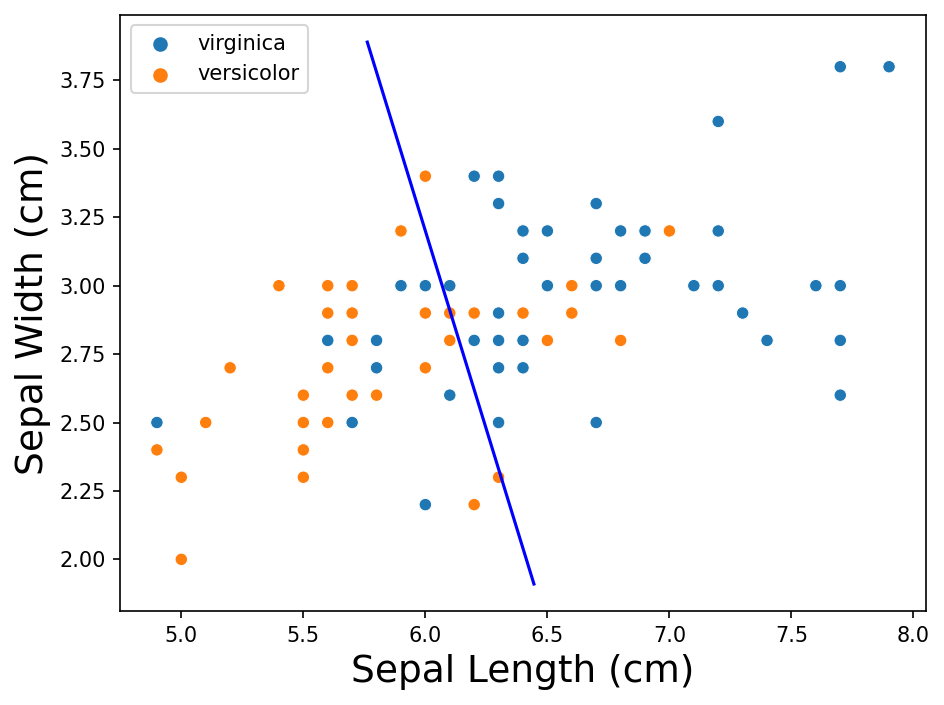

In [12]:
plot = sns.scatterplot(data=vv_df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label", hue_order=hue_order)
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");
plot_line(-2.9, 20.6, "b", "Boundary");

Now we do a petal length vs. petal width analysis.  First we will show a scatter plot of petal length vs. width.

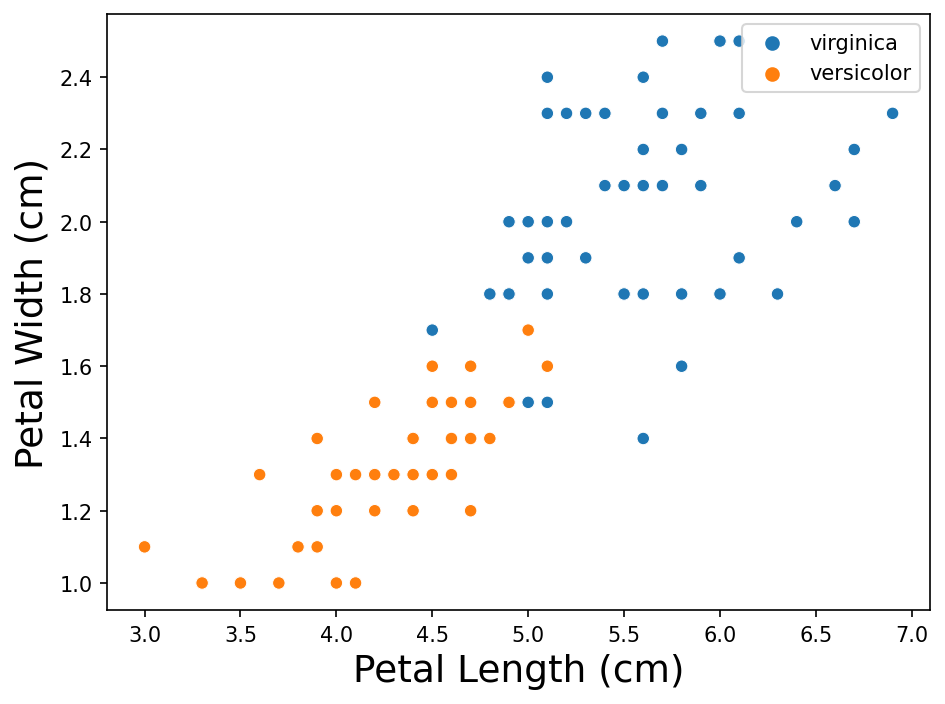

In [13]:
plot = sns.scatterplot(data=vv_df, x="petal_length (cm)", y="petal_width (cm)", hue="label", hue_order=hue_order)
plot.get_legend().set_title("")
plot.set(xlabel="Petal Length (cm)", ylabel="Petal Width (cm)");

Now we need to get another decision boundary by eyeballing it.  Between (4.0, 2.4) and (6.0, 1.0). `y = -0.7x + 5.2`  Let us show the original labels with this new boundary line.

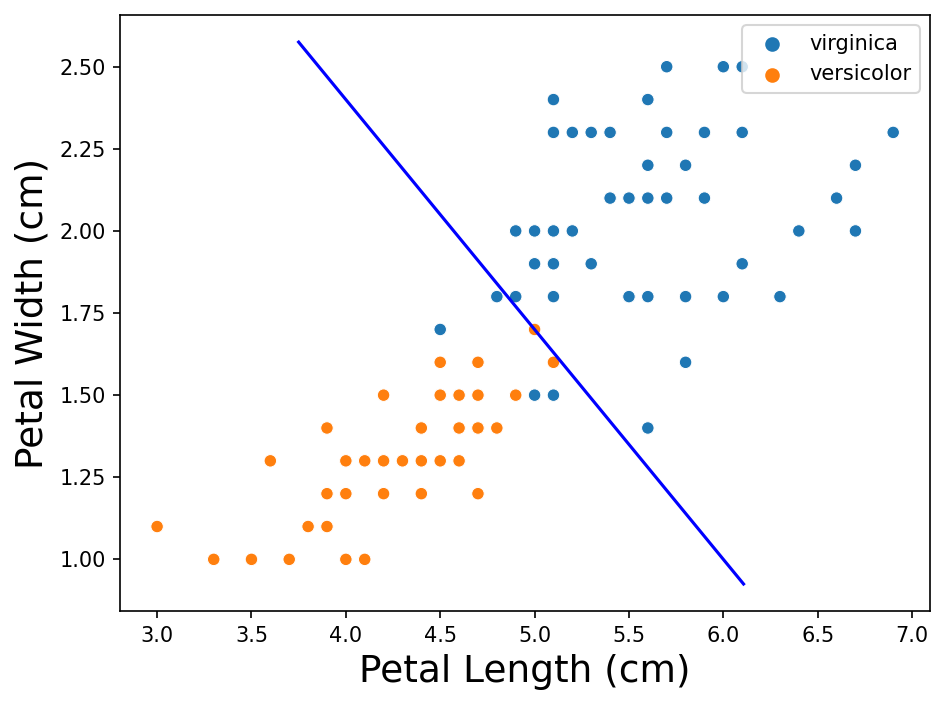

In [14]:
plot = sns.scatterplot(data=vv_df, x="petal_length (cm)", y="petal_width (cm)", hue="label", hue_order=hue_order)
plot.get_legend().set_title("")
plot.set(xlabel="Petal Length (cm)", ylabel="Petal Width (cm)");
plot_line(-0.7, 5.2, "b", "Boundary");

Now we can get the predicted labels for these two functions, plot the results, and compute the accuracy.

First we do this for Sepal Length vs. Width: `-2.9x - y + 20.6 = 0`

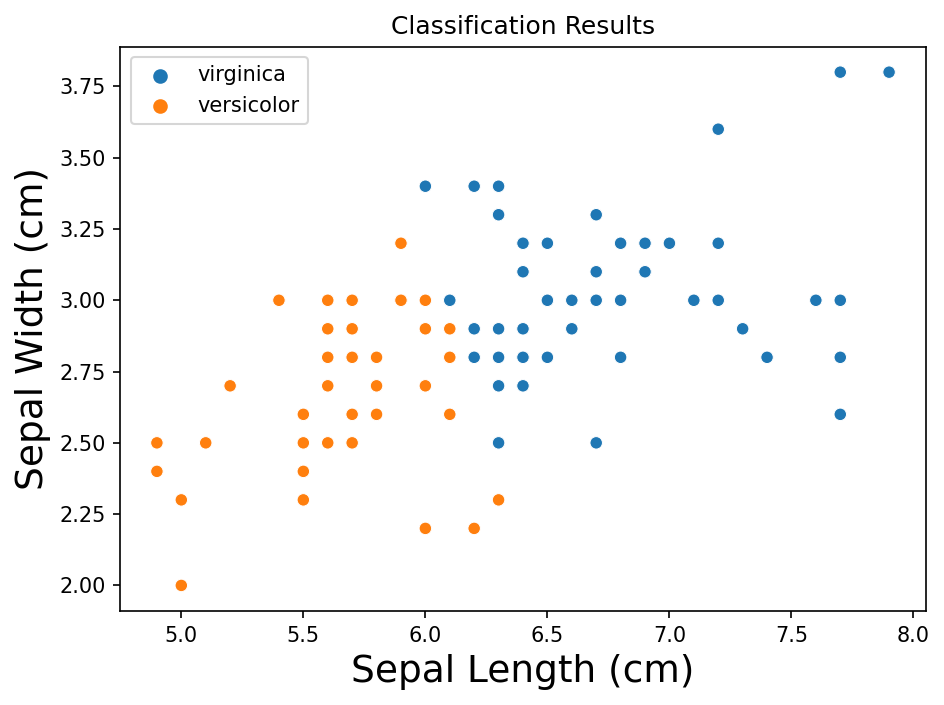

In [15]:
features = vv_df[["sepal_length (cm)", "sepal_width (cm)"]].values
dec_bound_vec = np.array([-2.9, -1.00, 20.6])
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, class_names=hue_order)
plot = sns.scatterplot(data=vv_df, x="sepal_length (cm)", y="sepal_width (cm)", hue=pred_labels, hue_order=hue_order)
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)", title="Classification Results");

In [16]:
print(f"Accuracy: {accuracy_score(vv_df.label, pred_labels):.1%}")

Accuracy: 74.0%


Next we do this for Petal Length vs. Width: `-0.7x - y + 5.2 = 0`

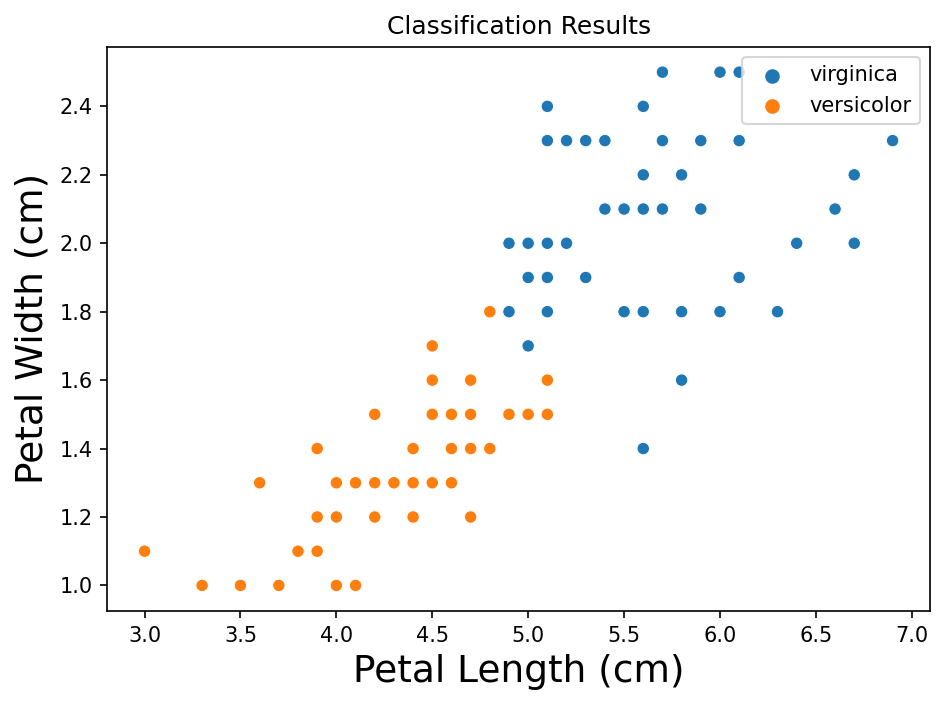

In [17]:
features = vv_df[["petal_length (cm)", "petal_width (cm)"]].values
dec_bound_vec = np.array([-0.7, -1.00, 5.2])
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, class_names=hue_order)
plot = sns.scatterplot(data=vv_df, x="petal_length (cm)", y="petal_width (cm)", hue=pred_labels, hue_order=hue_order)
plot.get_legend().set_title("")
plot.set(xlabel="Petal Length (cm)", ylabel="Petal Width (cm)", title="Classification Results");

In [18]:
print(f"Accuracy: {accuracy_score(vv_df.label, pred_labels):.1%}")

Accuracy: 94.0%


So we get the following accuracy:

-  By sepal length/width: 74%
-  By petal length/width: 94%

# Part III - Experimental Setup with Train-Test Splitting

We will re-analyze the setosa data by splitting our data into training, testing, and target datasets from the `setosa_training.csv`, `setosa_testing.csv`, and `setosa_target.csv` files respectively.  We will take a look at the info/head for these data sets.

In [19]:
train_df = pd.read_csv('./setosa_training.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              108 non-null    object 
 1   sepal_length (cm)  108 non-null    float64
 2   sepal_width (cm)   108 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.7+ KB


In [20]:
train_df.head()

,label,sepal_length (cm),sepal_width (cm)
0,setosa,6.0,2.9
1,setosa,7.6,3.0
2,setosa,7.7,3.0
3,setosa,7.4,2.8
4,setosa,6.5,3.2


In [21]:
test_df = pd.read_csv('./setosa_testing.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              42 non-null     object 
 1   sepal_length (cm)  42 non-null     float64
 2   sepal_width (cm)   42 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [22]:
test_df.head()

,label,sepal_length (cm),sepal_width (cm)
0,setosa,6.0,3.0
1,not setosa,5.4,3.9
2,not setosa,5.1,3.8
3,not setosa,5.0,3.4
4,setosa,5.6,3.0


In [23]:
target_df = pd.read_csv('./setosa_target.csv')
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              44 non-null     object 
 1   sepal_length (cm)  44 non-null     float64
 2   sepal_width (cm)   44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [24]:
target_df.head()

,label,sepal_length (cm),sepal_width (cm)
0,not setosa,4.3,3.0
1,setosa,5.7,2.5
2,setosa,5.6,2.9
3,setosa,6.8,3.2
4,not setosa,5.1,3.5


So we have 108 entries to train, 42 entries to test our model, and finally 44 entries to apply our trained model against.  The columns in all three files match up (sanity check

Now let us use the `LabelEncoder` class to convert our labels to numerical values and use the `LogisticRegression` class to generate our model based on our training data.

In [25]:
feature_names = ["sepal_length (cm)", "sepal_width (cm)"]
encoder = LabelEncoder()
encoder.fit(train_df.label)
y = encoder.transform(train_df.label)
X = train_df[feature_names].values
regression = LogisticRegression().fit(X, y)

We can now score our trainin, testing, and target data against the model:

In [26]:
pred_train = regression.predict(train_df[feature_names].values)
print(f"Training Accuracy: {accuracy_score(train_df.label, encoder.inverse_transform(pred_train)):.1%}")
pred_test = regression.predict(test_df[feature_names].values)
print(f"Testing Accuracy: {accuracy_score(test_df.label, encoder.inverse_transform(pred_test)):.1%}")
pred_target = regression.predict(target_df[feature_names].values)
print(f"Target Accuracy: {accuracy_score(target_df.label, encoder.inverse_transform(pred_target)):.1%}")

Training Accuracy: 100.0%
Testing Accuracy: 97.6%
Target Accuracy: 97.7%


So our accuracy scores were:

-  100% for our training set
-  97.6% for our testing set
-  97.2% for our target set

Let us analyze the linear regression parameters that were computed.

In [27]:
[[b0, b1]] = regression.coef_
[b2] = regression.intercept_
print(f"{b0}x + {b1}y + {b2} = 0")

3.1675488536369567x + -2.5734570165389066y + -9.14188352847362 = 0


And now let us translate that into slope/intercept form.

In [28]:
m = b0 / -b1
b = b2 / -b1
print(f"y = {m}x + {b}")

y = 1.2308536079211674x + -3.552374673336771


Let us plot the training, testing, and target data sets with that line.

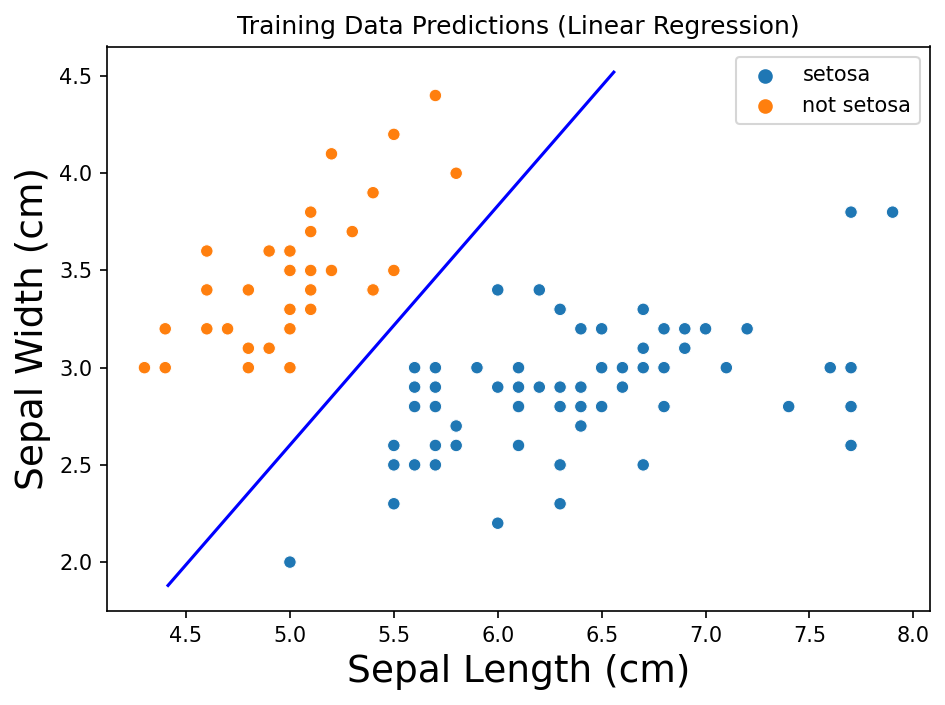

In [29]:
plot = sns.scatterplot(data=train_df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label")
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)", title="Training Data Predictions (Linear Regression)");
plot_line(m, b, "b", "Boundary");

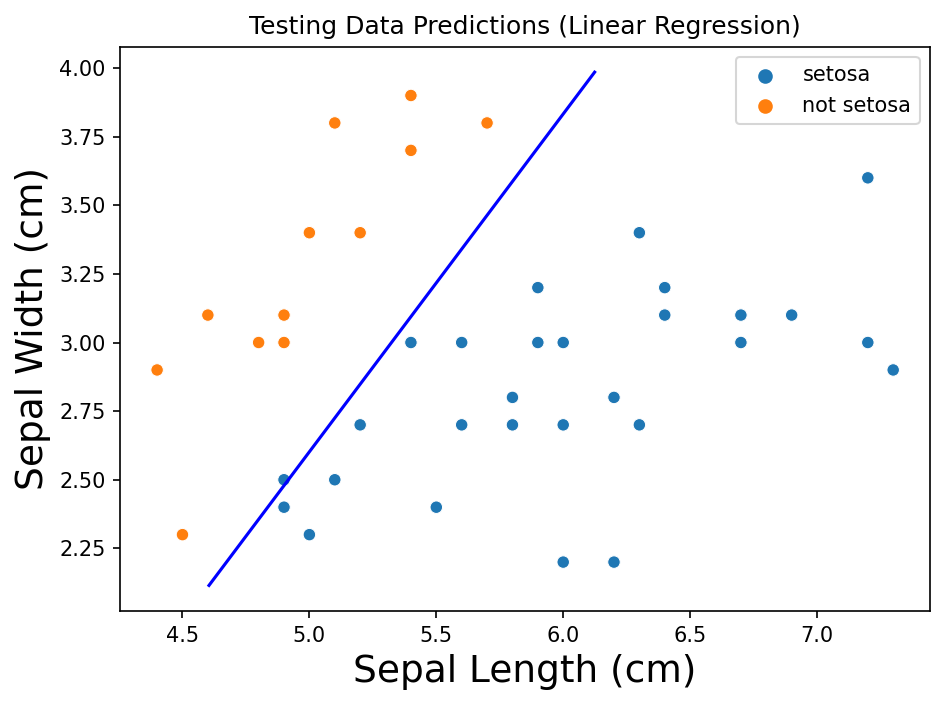

In [30]:
plot = sns.scatterplot(data=test_df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label")
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)", title="Testing Data Predictions (Linear Regression)");
plot_line(m, b, "b", "Boundary");

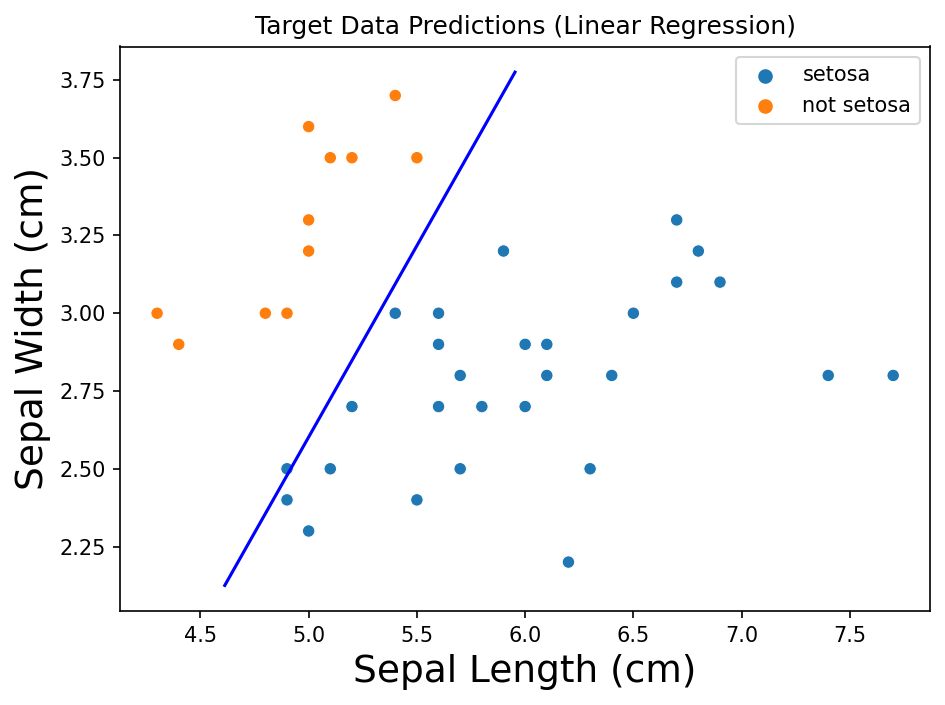

In [31]:
plot = sns.scatterplot(data=target_df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label", hue_order=["setosa", "not setosa"])
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)", title="Target Data Predictions (Linear Regression)");
plot_line(m, b, "b", "Boundary");

# Part IV - Comparing Models

Now we will use a support vector machine (SVM) to learn the weights for the linear model.

In [32]:
regression = LinearSVC(dual="auto").fit(X, y)

We can now analyze the accuracy for the SVM model for the training, testing, and target data sets.

In [33]:
pred_train = regression.predict(train_df[feature_names].values)
print(f"Training Accuracy: {accuracy_score(train_df.label, encoder.inverse_transform(pred_train)):.1%}")
pred_test = regression.predict(test_df[feature_names].values)
print(f"Testing Accuracy: {accuracy_score(test_df.label, encoder.inverse_transform(pred_test)):.1%}")
pred_target = regression.predict(target_df[feature_names].values)
print(f"Target Accuracy: {accuracy_score(target_df.label, encoder.inverse_transform(pred_target)):.1%}")

Training Accuracy: 100.0%
Testing Accuracy: 97.6%
Target Accuracy: 100.0%


So our accuracy scores were:

-  100% for our training set
-  97.6% for our testing set
-  100% for our target set

Let us analyze the linear regression parameters that were computed.

In [34]:
[[b0, b1]] = regression.coef_
[b2] = regression.intercept_
print(f"{b0}x + {b1}y + {b2} = 0")

1.371189047803469x + -2.160347524143011y + -0.673490691247326 = 0


And now let us translate that into slope/intercept form.

In [35]:
svm_m = b0 / -b1
svm_b = b2 / -b1
print(f"y = {svm_m}x + {svm_b}")

y = 0.6347076257313768x + -0.3117510880637101


Let us plot the LR model and SVM model against the training data set to compare them.

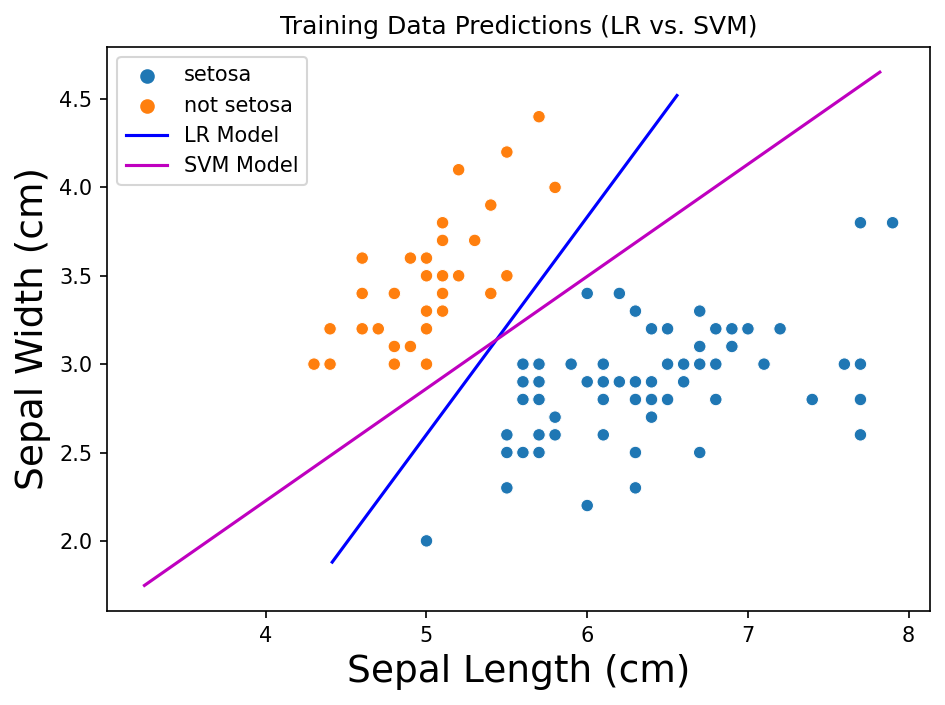

In [36]:
plot = sns.scatterplot(data=train_df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label")
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)", title="Training Data Predictions (LR vs. SVM)");
lr_line = plot_line(m, b, "b", "LR Model")
svm_line = plot_line(svm_m, svm_b, "m", "SVM Model")
plt.pyplot.legend(handles=plot.get_legend().legend_handles + [lr_line, svm_line]);